In [1]:
import pandas as pd
import sqlalchemy
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

# Deutsche Bahn Data

## Exploration

In [30]:
station_df = pd.read_sql("select * from stations", "sqlite:///data.sqlite")
station_df

,EVA_NR,DS100,IFOPT,NAME,Verkehr,Laenge,Breite,Betreiber_Name,Betreiber_Nr,Status
0,8002551,AELB,de:02000:11943,Hamburg Elbbrücken,RV,"10,0245","53,5345",DB Station und Service AG,0,neu
1,8001944,TETN,,Eutingen Nord,RV,"8,7531","48,4847",DB Station und Service AG,0,neu
2,8003074,MIA,,Ingolstadt Audi,RV,"11,4074564","48,7904959",DB Station und Service AG,0,neu
3,8001723,HEBA,,Einbeck Otto-Hahn-Straße,RV,"9,89290953","51,8144784",Ilmebahn GmbH,0,neu
4,8004371,KRO,,Nörvenich-Rommelsheim,nur DPN,"6,547586","50,782539",Rurtalbahn GmbH,0,neu
...,...,...,...,...,...,...,...,...,...,...
6514,8003318,SKB,de:10041:8003318,Kleinblittersdorf,nur DPN,"7,033459","49,157289",DB Station und Service AG,3243,
6515,8085007,TBO H,de:08115:4712,Böblingen Heusteigstr,nur DPN,"9,025771","48,675633",Zweckverband Schönbuchbahn,0,
6516,8085006,TBOS,de:08115:6742,Böblingen Südbf,nur DPN,"9,010509","48,677236",Zweckverband Schönbuchbahn,0,
6517,8085008,TBO Z,de:08115:4713,Böblingen Zimmerschlag,nur DPN,"9,03522491","48,6704564",Zweckverband Schönbuchbahn,0,


In [31]:
train_df = pd.read_sql("select * from  train_plan", "sqlite:///data.sqlite")
train_df.drop(['trip_type', 'train_type', 'train_number', 'train_line'])
train_df

,EVA_NR,stop_id,trip_type,train_type,train_number,train_line,platform,next_stations,passed_stations,arrival,departure
0,8002551,-1126778343855381740-2306141103-8,S,S,46254,31,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-14 11:24,2023-06-14 11:24
1,8002551,-2864650689472174529-2306141039-17,S,S,46247,3,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-14 11:22,2023-06-14 11:23
2,8002551,4883341926030014318-2306141111-7,S,S,46251,31,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-14 11:26,2023-06-14 11:27
3,8002551,-4704535323803976822-2306141101-7,S,S,46245,31,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-14 11:16,2023-06-14 11:17
4,8002551,2850455310495291019-2306141039-8,S,S,46242,3,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-14 11:00,2023-06-14 11:00
...,...,...,...,...,...,...,...,...,...,...,...
74,8003105,-7118320139550555008-2306141140-4,D,NWB,82314,RE18,2,Rastede|Oldenburg(Oldb)Hbf|Sandkrug|Huntlosen|...,Wilhelmshaven|Sande|Varel(Oldb),2023-06-14 12:03,2023-06-14 12:03
75,8003105,-7118320139550555008-2306141140-4,D,NWB,82314,RE18,2,Rastede|Oldenburg(Oldb)Hbf|Sandkrug|Huntlosen|...,Wilhelmshaven|Sande|Varel(Oldb),2023-06-14 12:03,2023-06-14 12:03
76,8003105,-7118320139550555008-2306141140-4,D,NWB,82314,RE18,2,Rastede|Oldenburg(Oldb)Hbf|Sandkrug|Huntlosen|...,Wilhelmshaven|Sande|Varel(Oldb),2023-06-14 12:03,2023-06-14 12:03
77,8003105,-7118320139550555008-2306141140-4,D,NWB,82314,RE18,2,Rastede|Oldenburg(Oldb)Hbf|Sandkrug|Huntlosen|...,Wilhelmshaven|Sande|Varel(Oldb),2023-06-14 12:03,2023-06-14 12:03


In [32]:
plan_change_df = pd.read_sql("select * from  plan_change", "sqlite:///data.sqlite")
plan_change_df

,EVA_NR,stop_id,next_stations,passed_stations,arrival,departure,platform
0,8002551,8778359416679356965-2306141159-17,N/A,N/A,2023-06-14 12:42,2023-06-14 12:43,N/A
1,8002551,-7876863606679438941-2306141159-8,N/A,N/A,2023-06-14 12:20,2023-06-14 12:20,N/A
2,8002551,-3844438298903660545-2306141141-7,N/A,N/A,2023-06-14 11:57,2023-06-14 11:58,N/A
3,8002551,250502404019490020-2306141109-17,N/A,N/A,2023-06-14 11:54,2023-06-14 11:55,N/A
4,8002551,5760628475671939342-2306141133-8,N/A,N/A,2023-06-14 11:53,2023-06-14 11:54,N/A
...,...,...,...,...,...,...,...
168,8002551,577182482334200049-2306140429-17,N/A,N/A,2023-06-14 05:12,2023-06-14 05:13,N/A
169,8002551,1354794752582138056-2306140449-8,N/A,N/A,2023-06-14 05:11,2023-06-14 05:12,N/A
170,8002551,1572946662377286184-2306140429-8,N/A,N/A,2023-06-14 04:49,2023-06-14 04:50,N/A
171,8002551,-5333143257563640894-2306140409-8,N/A,N/A,2023-06-14 04:29,2023-06-14 04:30,N/A


In [54]:
train_change_df = pd.merge(left=train_df, right=plan_change_df, on='stop_id', how='inner')
train_change_df

,EVA_NR_x,stop_id,trip_type,train_type,train_number,train_line,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,EVA_NR_y,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y
0,8002551,-1126778343855381740-2306141103-8,S,S,46254,31,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-14 11:24,2023-06-14 11:24,8002551,N/A,N/A,2023-06-14 11:25,2023-06-14 11:26,N/A
1,8002551,-1126778343855381740-2306141103-8,S,S,46254,31,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-14 11:24,2023-06-14 11:24,8002551,N/A,N/A,2023-06-14 11:25,2023-06-14 11:26,N/A
2,8002551,-1126778343855381740-2306141103-8,S,S,46254,31,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-14 11:24,2023-06-14 11:24,8002551,N/A,N/A,2023-06-14 11:25,2023-06-14 11:26,N/A
3,8002551,-2864650689472174529-2306141039-17,S,S,46247,3,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-14 11:22,2023-06-14 11:23,8002551,N/A,N/A,2023-06-14 11:22,2023-06-14 11:24,N/A
4,8002551,-2864650689472174529-2306141039-17,S,S,46247,3,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Pinneberg|Thesdorf|Halstenbek|Krupunder|Hambur...,2023-06-14 11:22,2023-06-14 11:23,8002551,N/A,N/A,2023-06-14 11:22,2023-06-14 11:24,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,8002551,-3844438298903660545-2306141141-7,S,S,46265,31,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-14 11:56,2023-06-14 11:57,8002551,N/A,N/A,2023-06-14 11:57,2023-06-14 11:58,N/A
68,8002551,-3844438298903660545-2306141141-7,S,S,46265,31,2,Hamburg-Veddel|Hamburg-Wilhelmsburg|Hamburg-Ha...,Hamburg-Altona(S)|Hamburg Holstenstraße|Hambur...,2023-06-14 11:56,2023-06-14 11:57,8002551,N/A,N/A,2023-06-14 11:57,2023-06-14 11:58,N/A
69,8002551,-2298383225585516656-2306141059-8,S,S,46252,3,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-14 11:20,2023-06-14 11:20,8002551,N/A,N/A,2023-06-14 11:20,2023-06-14 11:21,N/A
70,8002551,-2298383225585516656-2306141059-8,S,S,46252,3,1,Hamburg-Hammerbrook|Hamburg Hbf (S-Bahn)|Hambu...,Hamburg-Neugraben|Hamburg Neuwiedenthal|Hambur...,2023-06-14 11:20,2023-06-14 11:20,8002551,N/A,N/A,2023-06-14 11:20,2023-06-14 11:21,N/A


In [55]:
train_change_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EVA_NR_x           72 non-null     int64 
 1   stop_id            72 non-null     object
 2   trip_type          72 non-null     object
 3   train_type         72 non-null     object
 4   train_number       72 non-null     object
 5   train_line         72 non-null     object
 6   platform_x         72 non-null     object
 7   next_stations_x    72 non-null     object
 8   passed_stations_x  72 non-null     object
 9   arrival_x          72 non-null     object
 10  departure_x        72 non-null     object
 11  EVA_NR_y           72 non-null     int64 
 12  next_stations_y    72 non-null     object
 13  passed_stations_y  72 non-null     object
 14  arrival_y          72 non-null     object
 15  departure_y        72 non-null     object
 16  platform_y         72 non-null     object
dtyp

### Train Delay

In [68]:
train_change_df['arrival_x'] = pd.to_datetime(train_change_df['arrival_x'], format="%Y-%m-%d %H:%M")
train_change_df['arrival_y'] = pd.to_datetime(train_change_df['arrival_y'], format="%Y-%m-%d %H:%M")
train_change_df['departure_x'] = pd.to_datetime(train_change_df['departure_x'], format="%Y-%m-%d %H:%M")
train_change_df['departure_y'] = pd.to_datetime(train_change_df['departure_y'], format="%Y-%m-%d %H:%M")
arrival_difference = train_change_df['arrival_y'] - train_change_df['arrival_x']
departure_difference = train_change_df['departure_y'] - train_change_df['departure_x']

print(f"Biggest arrival delay: {arrival_difference.max()}")
print(f"Biggest departure delay: {departure_difference.max()}")

Biggest arrival delay: 0 days 00:02:00
Biggest departure delay: 0 days 00:02:00


### Platform change

In [67]:
train_change_df[train_change_df['platform_y'] != "N/A"]

,EVA_NR_x,stop_id,trip_type,train_type,train_number,train_line,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,EVA_NR_y,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y


### Planed path changes

In [69]:
train_change_df[train_change_df['next_stations_y'] != "N/A"]

,EVA_NR_x,stop_id,trip_type,train_type,train_number,train_line,platform_x,next_stations_x,passed_stations_x,arrival_x,departure_x,EVA_NR_y,next_stations_y,passed_stations_y,arrival_y,departure_y,platform_y


# Weather Data

## Exploration

In [2]:
weather_df = pd.read_sql("select * from raw_weather_data", "sqlite:///data.sqlite")
weather_df

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,4094,20211211,10,12.0,3.4,3,1.4,4,0.000,-999,-999.0,6.2,-999.00,1.7,89.38,2.5,0.5,0.1,eor
1,4094,20211212,10,4.8,1.3,3,0.0,0,2.533,-999,-999.0,5.9,-999.00,1.2,89.42,3.6,-3.1,-5.4,eor
2,4094,20211213,10,4.9,1.2,3,0.0,0,4.950,-999,-999.0,6.7,-999.00,2.6,91.21,6.9,1.0,0.2,eor
3,4094,20211214,10,6.5,2.0,3,0.0,0,0.000,-999,-999.0,6.9,-999.00,1.8,98.33,2.8,0.8,0.8,eor
4,4094,20211215,10,4.8,1.4,3,0.0,0,0.000,-999,-999.0,6.7,-999.00,2.1,94.04,3.4,0.9,1.1,eor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615619,2429,20230606,1,6.8,1.9,1,0.0,0,-999.000,-999,0.0,12.2,1018.30,15.3,72.25,22.5,7.9,3.1,eor
615620,2429,20230607,1,6.1,1.9,1,0.0,0,-999.000,-999,2.0,11.7,1017.64,14.3,74.39,-999.0,-999.0,-999.0,eor
615621,2429,20230608,1,5.9,1.8,1,0.0,0,-999.000,-999,2.4,11.8,1015.72,16.3,67.13,24.7,9.1,7.4,eor
615622,2429,20230609,1,7.9,2.1,1,0.0,0,-999.000,-999,3.0,11.6,1015.38,18.5,60.50,27.9,8.0,4.1,eor


[Data description](https://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/recent/DESCRIPTION_obsgermany_climate_daily_kl_recent_en.pdf)

![Table](data/weather_data/Screenshot%20from%202023-06-11%2013-08-02.png)

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615624 entries, 0 to 615623
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STATIONS_ID  615624 non-null  int64  
 1   MESS_DATUM   615624 non-null  int64  
 2   QN_3         615624 non-null  int64  
 3     FX         615624 non-null  float64
 4     FM         615624 non-null  float64
 5   QN_4         615624 non-null  int64  
 6    RSK         615624 non-null  float64
 7   RSKF         615624 non-null  int64  
 8    SDK         615624 non-null  float64
 9   SHK_TAG      615624 non-null  int64  
 10    NM         615624 non-null  float64
 11   VPM         615624 non-null  float64
 12    PM         615624 non-null  float64
 13   TMK         615624 non-null  float64
 14   UPM         615624 non-null  float64
 15   TXK         615624 non-null  float64
 16   TNK         615624 non-null  float64
 17   TGK         615624 non-null  float64
 18  eor          615624 non-

In [4]:
print(f"Number of recorded stations: {weather_df['STATIONS_ID'].nunique()}")

Number of recorded stations: 572


In [5]:
weather_df[" TMK"].describe()

count    615624.000000
mean       -109.106203
std         324.621643
min        -999.000000
25%           1.600000
50%           7.500000
75%          13.700000
max          31.700000
Name:  TMK, dtype: float64

Mean tempreture in negative, which means a lot of -999 values (basically nan) 

In [6]:
nan_tempreture_df = weather_df.loc[weather_df[' TMK'] == -999]
print(f"Number of -999 (nan) in tempreture: {len(nan_tempreture_df)}")

Number of -999 (nan) in tempreture: 72273


In [7]:
weather_station_description_df = pd.read_sql("select * from weather_station_description", "sqlite:///data.sqlite")
weather_station_description_df

,Stations_id,von_datum,bis_datum,Stationshoehe,geoBreite,geoLaenge,Stationsname,Bundesland
0,00001,19370101,19860630,478,47.8413,8.8493,Aach,Baden-Württemberg
1,00003,18910101,20110331,202,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,00011,19800901,20200930,680,47.9736,8.5205,Donaueschingen (Landeplatz),Baden-Württemberg
3,00044,19690101,20230613,44,52.9336,8.2370,Großenkneten,Niedersachsen
4,00052,19690101,20011231,46,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
...,...,...,...,...,...,...,...,...
1345,19607,19720501,20010430,615,50.6952,13.4972,Cämmerswalde-Rauschenbach,Sachsen
1346,19617,19410101,20061231,310,49.7391,10.6039,Burghaslach,Bayern
1347,19631,19060101,19691231,268,50.8083,10.2294,Salzungen,Thüringen
1348,19647,19510101,20051031,178,49.4547,8.9794,Eberbach/Neckar,Baden-Württemberg


In [8]:
weather_station_description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Stations_id    1350 non-null   object
 1   von_datum      1350 non-null   object
 2   bis_datum      1350 non-null   object
 3   Stationshoehe  1350 non-null   object
 4   geoBreite      1350 non-null   object
 5   geoLaenge      1350 non-null   object
 6   Stationsname   1350 non-null   object
 7   Bundesland     1350 non-null   object
dtypes: object(8)
memory usage: 84.5+ KB


In [9]:
print(f"Number of all stations: {weather_station_description_df['Stations_id'].nunique()}")

Number of all stations: 1350


## Cleaning

In [10]:
clean_weather_df = weather_df.copy(deep=True)
clean_weather_df["MESS_DATUM"] = pd.to_datetime(clean_weather_df['MESS_DATUM'], format='%Y%m%d')

In [11]:
clean_weather_df = clean_weather_df[clean_weather_df[" TMK"] != -999]

In [12]:
clean_weather_df = clean_weather_df[["STATIONS_ID", "MESS_DATUM", " TMK"]]
clean_weather_df = clean_weather_df.rename({" TMK": "temperature", "MESS_DATUM":"date", "STATIONS_ID":"station_id"}, axis=1)
clean_weather_df["station_id"] = clean_weather_df["station_id"].astype(str)
clean_weather_df

,station_id,date,temperature
0,4094,2021-12-11,1.7
1,4094,2021-12-12,1.2
2,4094,2021-12-13,2.6
3,4094,2021-12-14,1.8
4,4094,2021-12-15,2.1
...,...,...,...
615619,2429,2023-06-06,15.3
615620,2429,2023-06-07,14.3
615621,2429,2023-06-08,16.3
615622,2429,2023-06-09,18.5


In [13]:
weather_station_description_df = weather_station_description_df[["Stations_id", "geoBreite", "geoLaenge", "Stationsname", "Bundesland"]]
weather_station_description_df = weather_station_description_df.rename({"Stations_id": "station_id", "Stationsname": "station_name"}, axis=1)
weather_station_description_df['station_id'] = weather_station_description_df['station_id'].astype(int)
weather_station_description_df['station_id'] = weather_station_description_df['station_id'].astype(str)
weather_station_description_df

,station_id,geoBreite,geoLaenge,station_name,Bundesland
0,1,47.8413,8.8493,Aach,Baden-Württemberg
1,3,50.7827,6.0941,Aachen,Nordrhein-Westfalen
2,11,47.9736,8.5205,Donaueschingen (Landeplatz),Baden-Württemberg
3,44,52.9336,8.2370,Großenkneten,Niedersachsen
4,52,53.6623,10.1990,Ahrensburg-Wulfsdorf,Schleswig-Holstein
...,...,...,...,...,...
1345,19607,50.6952,13.4972,Cämmerswalde-Rauschenbach,Sachsen
1346,19617,49.7391,10.6039,Burghaslach,Bayern
1347,19631,50.8083,10.2294,Salzungen,Thüringen
1348,19647,49.4547,8.9794,Eberbach/Neckar,Baden-Württemberg


In [14]:
merged_weather_df = pd.merge(left=clean_weather_df, right=weather_station_description_df, on='station_id', copy=True, how="left")
merged_weather_df

,station_id,date,temperature,geoBreite,geoLaenge,station_name,Bundesland
0,4094,2021-12-11,1.7,47.8062,9.6206,"Weingarten, Kr. Ravensburg",Baden-Württemberg
1,4094,2021-12-12,1.2,47.8062,9.6206,"Weingarten, Kr. Ravensburg",Baden-Württemberg
2,4094,2021-12-13,2.6,47.8062,9.6206,"Weingarten, Kr. Ravensburg",Baden-Württemberg
3,4094,2021-12-14,1.8,47.8062,9.6206,"Weingarten, Kr. Ravensburg",Baden-Württemberg
4,4094,2021-12-15,2.1,47.8062,9.6206,"Weingarten, Kr. Ravensburg",Baden-Württemberg
...,...,...,...,...,...,...,...
543346,2429,2023-06-06,15.3,53.9897,9.5697,Itzehoe,Schleswig-Holstein
543347,2429,2023-06-07,14.3,53.9897,9.5697,Itzehoe,Schleswig-Holstein
543348,2429,2023-06-08,16.3,53.9897,9.5697,Itzehoe,Schleswig-Holstein
543349,2429,2023-06-09,18.5,53.9897,9.5697,Itzehoe,Schleswig-Holstein


In [15]:
merged_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543351 entries, 0 to 543350
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   station_id    543351 non-null  object        
 1   date          543351 non-null  datetime64[ns]
 2   temperature   543351 non-null  float64       
 3   geoBreite     543351 non-null  object        
 4   geoLaenge     543351 non-null  object        
 5   station_name  543351 non-null  object        
 6   Bundesland    543351 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 29.0+ MB


In [ ]:
merged_weather_df.to_sql("weather_data_processed", "sqlite:///data.sqlite", index=False, if_exists='replace')

## Analysis

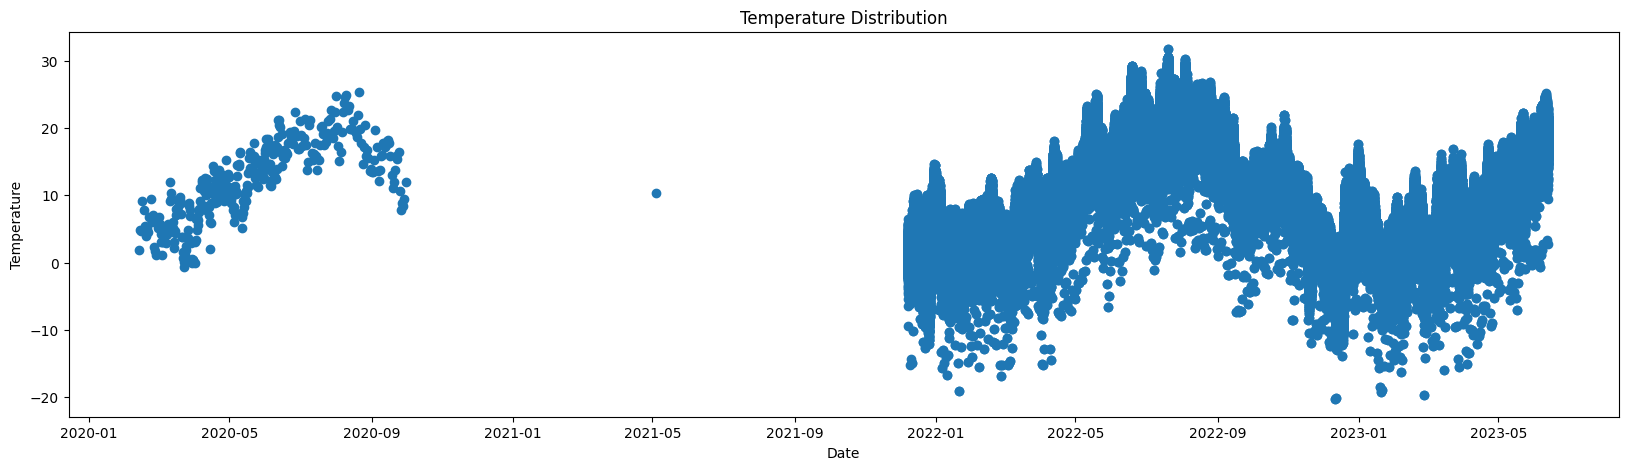

In [16]:
# px.box(merged_weather_df, x='date', y='temperature').show(renderer='vscode')
plt.figure(figsize=(20, 5))
plt.plot_date(merged_weather_df['date'], merged_weather_df['temperature'])
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature Distribution")
plt.show();

In [17]:
tmp = merged_weather_df.query("date < '2020-11' and date > '2020-06'")
print(f"Number of recorded tempretures betweent 2020-06 & 2020-11: {len(tmp)}")
print(f"Number of recorded days betweent 2020-06 & 2020-11: {len(tmp['date'].unique())}")
print(f"Number of recorded stations betweent 2020-06 & 2020-11: {tmp['station_id'].nunique()}")

Number of recorded tempretures betweent 2020-06 & 2020-11: 135
Number of recorded days betweent 2020-06 & 2020-11: 121
Number of recorded stations betweent 2020-06 & 2020-11: 2


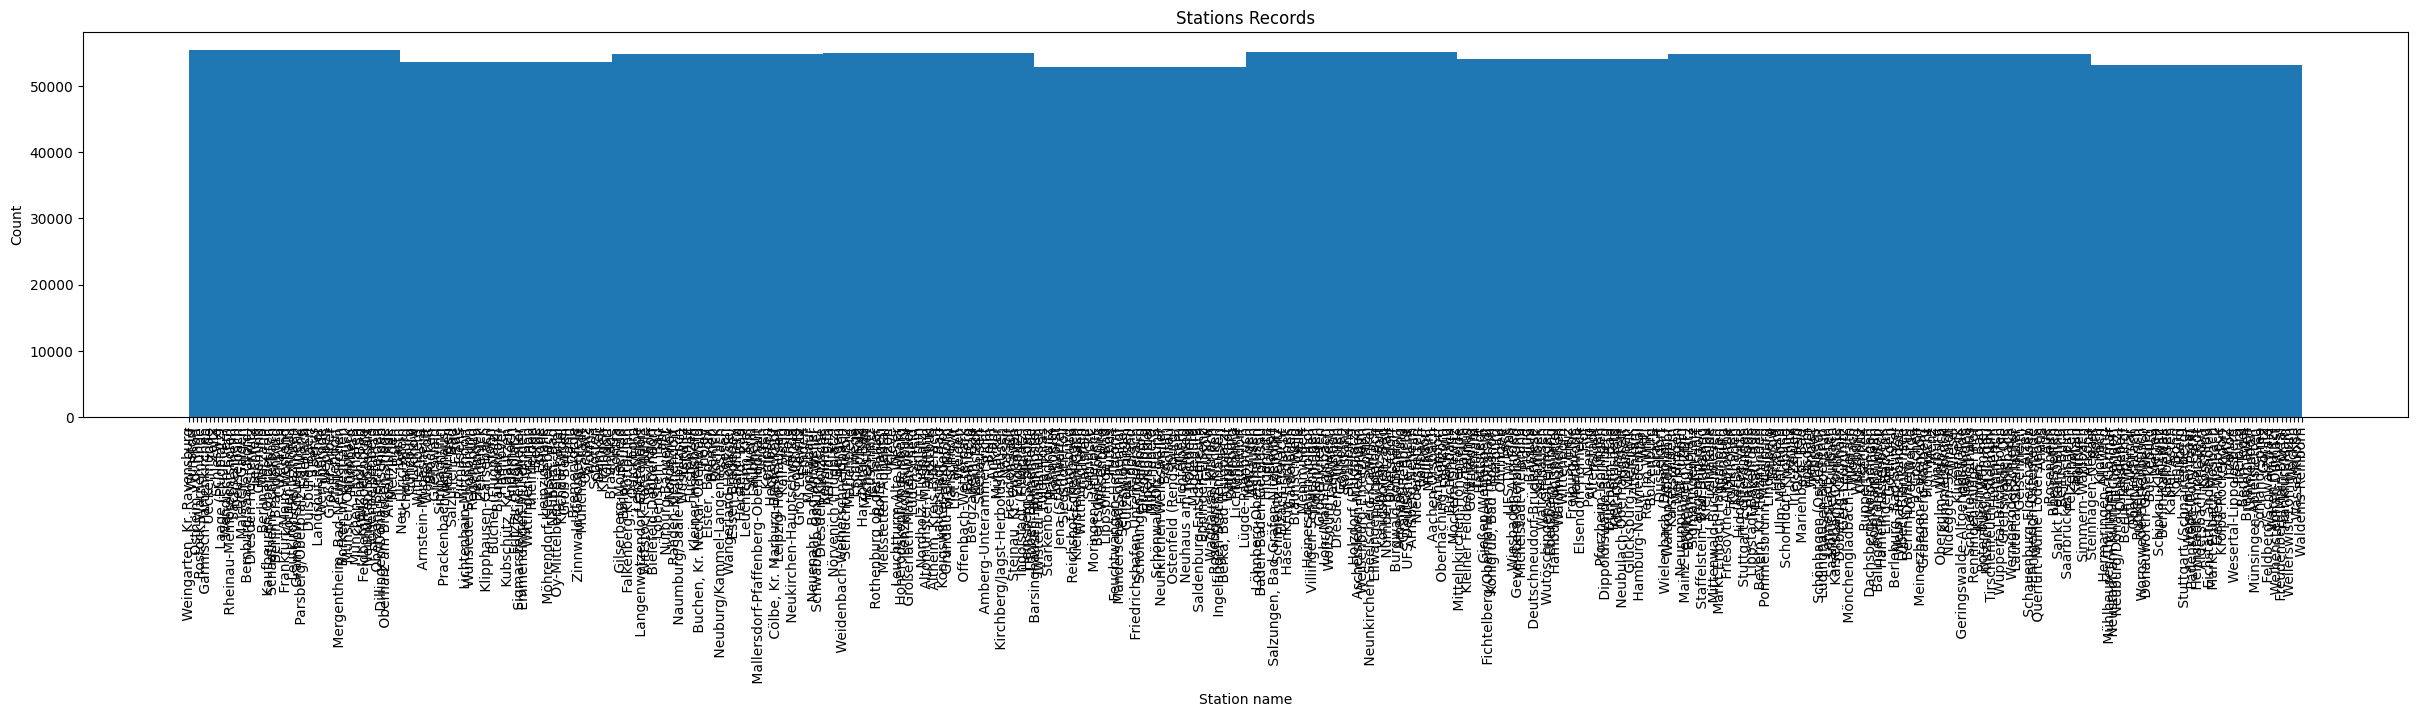

In [18]:
plt.figure(figsize=(30, 5))
plt.hist(merged_weather_df['station_name'])
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.xlabel("Station name")
plt.title("Stations Records")
plt.show()